# Importazione dati
Questo notebook verrà usato per l'importazione di tutti i database che ci servono \
I dati saranno salvati quindi nella cartella data\processed

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Point, Polygon

#Per usare multi cartelle (cookiecutter)
import sys
sys.path.append('./../src')

import make_dataset as m_d




## Grid data

SafeImport_Output:   Index(['cellId', 'geometry'], dtype='object')


cellId                                           geometry
0         38  POLYGON ((10.91462 45.68201, 10.92746 45.68179...
1         39  POLYGON ((10.92746 45.68179, 10.94029 45.68157...
2         40  POLYGON ((10.94029 45.68157, 10.95312 45.68136...
3        154  POLYGON ((10.90209 45.69122, 10.91493 45.69100...
4        155  POLYGON ((10.91493 45.69100, 10.92777 45.69079...
...      ...                                                ...
6570   11336  POLYGON ((11.80475 46.52767, 11.81777 46.52735...
6571   11337  POLYGON ((11.81777 46.52735, 11.83080 46.52703...
6572   11452  POLYGON ((11.79219 46.53698, 11.80521 46.53666...
6573   11453  POLYGON ((11.80521 46.53666, 11.81824 46.53634...
6574   11454  POLYGON ((11.81824 46.53634, 11.83126 46.53601...

[6575 rows x 2 columns]

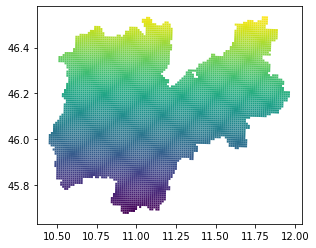

In [2]:
#GRID
grid=m_d.safe_import("grid")

grid.plot('cellId')
grid

## Non da' problemi, poi dovrò mergiarlo

# Social Pulse

created   timestamp        user      municipality.name  \
0      2013-11-01T00:04:16  1383260656  5fd4f31f75                 Trento   
1      2013-11-01T00:01:14  1383260474  68c0e98182                Pinzolo   
2      2013-11-01T00:43:03  1383262983  abe21fc052               Cavalese   
3      2013-11-01T00:38:37  1383262717  94d1efbbfd               Rovereto   
4      2013-11-01T00:45:40  1383263140  d261d03075  San Michele all'Adige   
...                    ...         ...         ...                    ...   
27936  2013-12-31T00:25:48  1388445948  826558e00e          Vigo di Fassa   
27937  2013-12-29T13:12:46  1388319166  06e9b1cdff               Predazzo   
27938  2013-11-19T00:51:39  1384818699  e61ce711d3      Sant'Orsola Terme   
27939  2013-11-23T09:49:36  1385196576  e61ce711d3      Sant'Orsola Terme   
27940  2013-12-31T16:31:33  1388503893  e61ce711d3       Palù del Fersina   

      language                   geometry  
0           it  POINT (11.13000 46.07000)  
1           tl  POINT (10.83000 46.23000)  
2           en  POINT (11.46000 46.29000)  
3           it  POINT (11.04000 45.89000)  
4           ru  POINT (11.12000 46.20000)  
...        ...                        ...  
27936       it  POINT (11.68000 46.42000)  
27937       it  POINT (11.60000 46.31000)  
27938       it  POINT (11.30000 46.11000)  
27939       it  POINT (11.30000 46.11000)  
27940       it  POINT (11.35000 46.13000)  

[27941 rows x 6 columns]

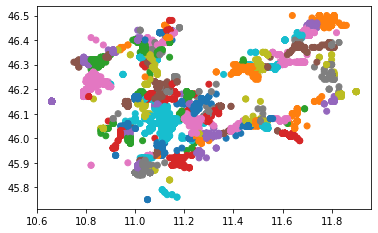

In [3]:
#Questo fallisce ad importare, come mostrato a lezione 24

tweets_json = json.load( open(m_d.data_path_in / m_d.files['twitter'][0]) )

tweets = gpd.GeoDataFrame(tweets_json['features'])

#Creiamo il punto smontando la casella point
tweets['geometry'] = tweets['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
tweets.drop(columns=['geomPoint.geom'],inplace=True)

#Droppo roba inutile
tweets.drop(columns=['municipality.acheneID'],inplace=True)
tweets.drop(columns=['entities'],inplace=True)

tweets.plot("municipality.name")

#tweets.dtypes
tweets

# Weather

In [4]:
"""
#Fallisce ad importare
weather=m_d.safe_import("weather")
weather
#Come prima ho metadati
"""
weather_json = json.load( open(m_d.data_path_in / m_d.files['weather'][0]) )
weather = gpd.GeoDataFrame(weather_json['features'])


#Elimino le colonne del vento (dati molto incompleti)
weather.drop(weather.columns[list(range(202,298))], axis=1, inplace=True)
weather.drop(columns=['minWind', "maxWind"], inplace=True)

#Svolgiamo infine i punti geometrici
weather['geometry'] = weather['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
weather.drop(columns=['geomPoint.geom'],inplace=True)

pd.set_option('display.max_columns', None)

#Lo salvo che mi serve in sezione ML
weather.to_csv(m_d.data_path_out / 'weather_final.csv',index=False)

weather.head(5)



station  elevation        date   timestamp  minTemperature  maxTemperature  \
0   T0071        905  2013-11-01  1383260400             4.5            12.3   
1   T0032       1155  2013-11-01  1383260400             6.5            10.2   
2   T0096       1205  2013-11-01  1383260400             6.5            11.8   
3   T0074        720  2013-11-01  1383260400             6.2            13.6   
4   T0101        201  2013-11-01  1383260400            11.1            16.3   

   precipitation  temperatures.0000  temperatures.0015  temperatures.0030  \
0          False                8.4                8.3                8.2   
1          False                7.3                7.3                7.1   
2          False                8.2                8.2                8.1   
3          False               10.2               10.2               10.1   
4          False               12.8               12.7               12.9   

   temperatures.0045  temperatures.0100  temperatures.0115  temperatures.0130  \
0                8.1                8.2                8.2                8.3   
1                6.9                6.7                6.7                6.8   
2                8.1                8.1                8.1                8.1   
3               10.1               10.1               10.0                9.9   
4               12.6               12.4               12.0               12.0   

   temperatures.0145  temperatures.0200  temperatures.0215  temperatures.0230  \
0                8.1                8.0                7.7                7.5   
1                6.7                6.5                6.7                6.7   
2                8.0                8.0                8.0                8.0   
3                9.9                9.8                9.8                9.7   
4               11.7               11.9               11.7               11.7   

   temperatures.0245  temperatures.0300  temperatures.0315  temperatures.0330  \
0                7.6                7.8                7.8                7.5   
1                6.7                6.8                6.9                6.9   
2                8.0                7.8                7.7                7.6   
3                9.6                9.4                9.2                9.2   
4               11.9               12.0               12.0               12.1   

   temperatures.0345  temperatures.0400  temperatures.0415  temperatures.0430  \
0                7.0                6.6                6.1                6.3   
1                6.9                7.0                7.1                7.2   
2                7.4                7.3                7.3                7.3   
3                9.2                9.3                9.3                9.2   
4               12.1               12.1               12.0               11.9   

   temperatures.0445  temperatures.0500  temperatures.0515  temperatures.0530  \
0                6.1                5.7                5.7                5.0   
1                7.2                7.2                7.1                7.1   
2                7.4                7.4                7.4                7.4   
3                9.0                8.7                8.5                8.2   
4               12.0               12.0               12.2               12.0   

   temperatures.0545  temperatures.0600  temperatures.0615  temperatures.0630  \
0                4.9                4.9                4.7                4.9   
1                7.1                7.3                7.5                7.4   
2                7.4                7.4                7.4                7.2   
3                8.1                7.9                7.6                7.3   
4               11.9               11.8               11.8               11.7   

   temperatures.0645  temperatures.0700  temperatures.0715  temperatures.0730  \
0                5.0                5.0                

station elevation                   geometry
0   T0071       905  POINT (10.79583 46.31340)
1   T0032      1155  POINT (11.25372 45.94027)
2   T0096      1205  POINT (11.66458 46.38364)
3   T0074       720  POINT (10.91841 46.35160)
4   T0101       201  POINT (11.07973 46.15635)

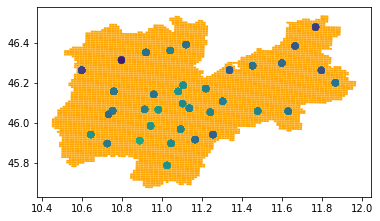

In [5]:
ax = grid.plot(color="orange")
weather.plot(column='maxTemperature',ax=ax)

#Visto che i tweets sono disassociati dalle stazioni, risulta necessario restringersi alla stazione più vicina
# -> Creo database delle stazioni
stations=m_d.orderstation(weather)


"""
Rimane un problema, le temperature non sono svolte
Spoiler: svolgerle è molto difficile (pandas ha davvero forte limitazioni sulle azioni che fa fare)
         le soluzioni sono molto non-pythoniche (o almeno quelle che ho trovato)
Idea migliore: creo una funzione (timesearch) che svolge il tempo per fare in modo che mi trovi temperatura e precipitazioni
"""
stations.head(5)

# Precipitazioni
Questa tabella è **probabilmente** più precisa di weather (fornisce per ogni elemento della griglia) -> darebbe precipitazione più precisa, ma mancano molte entries. Per ora usiamo solo quello del weather (anche perchè ho già scritto tutto con quel database) \
NOTA: per far questo basta un merge con DB tweets, ma devo ricalcolare il valore alle mezz'ore a causa di come ho discretizzato sotto

In [6]:
## Lascio qua la cella a puro scopo di chiarezza
"""
Questo si comporta bene
Non è utile importare i data availability tendenzialmente
La seconda colonna è il cellId, non viene detto ma si può verificare con il database grid
    suppongo la terza colonna sia intensità
"""

"""
dummy=m_d.safe_import('precip')
#Problema: il primo dato vien preso come dizionario
#Converto colonne
dummy=dummy.rename(columns={'201311010000': 'time', "2383": 'cellId', "1" : 'intensity'})

#Riaggiungo il primo dato
precipitation=m_d.appforth(dummy,[201311010000,2383,1])

#Converto il tempo per averlo in formato identico agli altri
temp=np.array(precipitation["time"])
#Questi sono integers, li svolgo in modo diverso
minutes=temp%100
temp=np.floor(temp/100)
precipitation["hours"]=np.around(temp%100+minutes/60,2)
temp=np.floor(temp/100)
precipitation["day"]=[int(i%100) for i in temp]
temp=np.floor(temp/100)
precipitation["month"]=[int(i%100) for i in temp]
precipitation.drop(columns=["time"], inplace=True)

precipitation
"""
""""""

''

# Electro

In [7]:
# devo prima unire i due dataset di line set -> nov e poi nov -> dicembre

#Problema: il primo dato vien preso come dizionario
electro = m_d.safe_import('SET-1')
electro=electro.rename(columns={'DG1000420': 'LINESET', "2013-11-01 00:00": 'Timestamp', "37.439999" : 'Value Amp'})
#Riaggiungo il primo dato
electro=m_d.appforth(electro,['DG1000420','2013-11-01 00:00',37.439999])

temp = m_d.safe_import('SET-2')
temp=temp.rename(columns={'DG1000420': 'LINESET', "2013-12-01 00:00": 'Timestamp', "36.719997" : 'Value Amp'})
#Riaggiungo il primo dato
temp=m_d.appforth(temp,['DG1000420','2013-12-01 00:00',36.719997])

electro=electro.append(temp, ignore_index=True)
del temp  #Pesa tanto

electro

SafeImport_Output:   Index(['DG1000420', '2013-11-01 00:00', '37.439999'], dtype='object')
SafeImport_Output:   Index(['DG1000420', '2013-12-01 00:00', '36.719997'], dtype='object')


LINESET         Timestamp  Value Amp
0        DG1000420  2013-11-01 00:00  37.439999
1        DG1000420  2013-11-01 00:10  37.439999
2        DG1000420  2013-11-01 00:20  36.000000
3        DG1000420  2013-11-01 00:30  35.279999
4        DG1000420  2013-11-01 00:40  35.279999
...            ...               ...        ...
1615889  DG1056626  2013-12-31 23:10  79.574997
1615890  DG1056626  2013-12-31 23:20  78.625000
1615891  DG1056626  2013-12-31 23:30  77.025002
1615892  DG1056626  2013-12-31 23:40  76.125000
1615893  DG1056626  2013-12-31 23:50  75.775002

[1615894 rows x 3 columns]

In [8]:
#Unisco a dataframe che descrive posizioni sulla griglia
#Ne faccio un secondo che per alcune operazione è più comodo operare con l'altro
lines = m_d.safe_import('SET-lines')
electroLines = electro.merge(right=lines, how='outer')

#Ci sono incompatibilità tra i record salvati quindi li droppo cattivo
electroLines = electroLines.dropna()

electroLines

SafeImport_Output:   Index(['SQUAREID', 'LINESET', 'NR_UBICAZIONI'], dtype='object')


LINESET         Timestamp  Value Amp  SQUAREID  NR_UBICAZIONI
0         DG1000420  2013-11-01 00:00  37.439999      4037              2
1         DG1000420  2013-11-01 00:00  37.439999      4154             13
2         DG1000420  2013-11-01 00:00  37.439999      4155             20
3         DG1000420  2013-11-01 00:00  37.439999      4156              2
4         DG1000420  2013-11-01 00:00  37.439999      4269              1
...             ...               ...        ...       ...            ...
22227259  DG1056626  2013-12-31 23:50  75.775002      8502              1
22227260  DG1056626  2013-12-31 23:50  75.775002      8503              4
22227261  DG1056626  2013-12-31 23:50  75.775002      8621              1
22227262  DG1056626  2013-12-31 23:50  75.775002      8972             25
22227263  DG1056626  2013-12-31 23:50  75.775002      9089              8

[22227264 rows x 5 columns]

In [9]:
#Serve svolgere il timestamp
temp=list(electro["Timestamp"])
electro["month"]=[int(st[5:7]) for st in temp]
electro["day"]=[int(st[8:10]) for st in temp]
#electro["hours"]=[int(st[11:13])+int(st[14:16])/60 for st in temp]
electro["hours"]=[np.around(int(st[11:13])+int(st[14:16])/60, 2) for st in temp]
    #Round per safer groupby, albeit slower (should not matter, just print uniques)
    #Utile che fa anche un file più leggero
#print(electro.hours.unique())
    
electro.drop(columns=["Timestamp"], inplace=True)
electro.to_csv(m_d.data_path_out / 'electro_final.csv',index=False)
    #Lo salvo che mi serve altrove, e questo è lenta da eseguire

electro

LINESET  Value Amp  month  day  hours
0        DG1000420  37.439999     11    1   0.00
1        DG1000420  37.439999     11    1   0.17
2        DG1000420  36.000000     11    1   0.33
3        DG1000420  35.279999     11    1   0.50
4        DG1000420  35.279999     11    1   0.67
...            ...        ...    ...  ...    ...
1615889  DG1056626  79.574997     12   31  23.17
1615890  DG1056626  78.625000     12   31  23.33
1615891  DG1056626  77.025002     12   31  23.50
1615892  DG1056626  76.125000     12   31  23.67
1615893  DG1056626  75.775002     12   31  23.83

[1615894 rows x 5 columns]

# CIRCOSCRIZIONI

SafeImport_Output:   Index(['numero_cir', 'area', 'perimetro', 'nome', 'fumetto', 'geometry'], dtype='object')


area  perimetro                          nome  \
0    8817959      14719                       GARDOLO   
1   15712181      17850                         MEANO   
2   36949609      38485                       BONDONE   
3    8663138      16403                      SARDAGNA   
4   16687779      27197              RAVINA-ROMAGNANO   
5   13199398      20575                    ARGENTARIO   
6   15433274      18464                          POVO   
7   16409555      24413                    MATTARELLO   
8    7342864      15395                    VILLAZZANO   
9    6962104      15418                  OLTREFERSINA   
10   3073349      10962           S.GIUSEPPE-S.CHIARA   
11   8599464      23151  CENTRO STORICO PIEDICASTELLO   

                                              fumetto  \
0                       Circoscrizione n. 1 - GARDOLO   
1                         Circoscrizione n. 2 - MEANO   
2                       Circoscrizione n. 3 - BONDONE   
3                      Circoscrizione n. 4 - SARDAGNA   
4              Circoscrizione n. 5 - RAVINA-ROMAGNANO   
5                    Circoscrizione n. 6 - ARGENTARIO   
6                          Circoscrizione n. 7 - POVO   
7                    Circoscrizione n. 8 - MATTARELLO   
8                    Circoscrizione n. 9 - VILLAZZANO   
9                 Circoscrizione n. 10 - OLTREFERSINA   
10         Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA   
11  Circoscrizione n. 12 - CENTRO STORICO PIEDICAS...   

                                             geometry  
0   POLYGON ((663533.992 5108350.627, 663537.172 5...  
1   POLYGON ((666651.786 5109264.902, 666650.353 5...  
2   POLYGON ((660741.737 5109007.135, 660757.283 5...  
3   POLYGON ((661627.540 5104968.137, 661632.747 5...  
4   POLYGON ((663871.728 5094972.066, 663852.148 5...  
5   POLYGON ((667907.213 5105334.453, 667905.638 5...  
6   POLYGON ((669072.179 5099653.356, 668637.088 5...  
7   POLYGON ((663871.728 5094972.066, 663875.878 5...  
8   POLYGON ((666987.471 5098181.575, 666974.784 5...  
9   POLYGON ((663813.095 5101039.248, 663813.095 5...  
10  POLYGON ((663312.544 5102745.129, 663330.224 5...  
11  POLYGON ((664569.127 5104686.144, 664561.214 5...

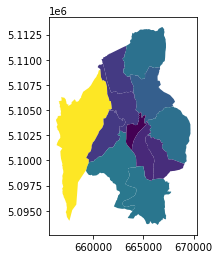

In [10]:
#Friendship ended with database del prof, database della provincia is now my best friend
circ=m_d.safe_import('circoscrizioni')

circ.plot("area")
circ=circ.sort_values("numero_cir").reset_index()
circ.drop(columns=["index", "numero_cir"], inplace=True)
circ

In [11]:
#Sistemo per riallacciare
circ.drop(columns=["fumetto", "area", "perimetro"],inplace=True)
circ.rename(columns={"nome" : "circoscrizione"}, inplace=True)

# Unione di Databases
Passo 1: creare un database dei tweets; a ogni tweet associo tempo atmosferico e temperatura \

Il tempo viene binnato in 30 minuti (mediamente abbiamo sui 20 tweets all'ora), visto che i dati sono ottenuti ogni 10 o 15 perderei informazioni ma per i tweets uso diretto il valore dalla tabella)

In [12]:
tweets=tweets.set_crs("EPSG:4326")
circ=circ.to_crs("EPSG:4326")
tweets = gpd.sjoin(tweets, grid, how="inner", op='intersects')
tweets.drop(columns="index_right", inplace=True)
tweets = gpd.sjoin(tweets, circ, how="left", op='intersects') 
    #Questi li attacco anche se potrei usare dirretto la grid, così è più comodo
tweets.drop(columns="index_right", inplace=True)
tweets


created   timestamp        user municipality.name language  \
0      2013-11-01T00:04:16  1383260656  5fd4f31f75            Trento       it   
7      2013-11-01T01:25:10  1383265510  5fd4f31f75            Trento       it   
8      2013-11-01T01:38:40  1383266320  5fd4f31f75            Trento       pt   
131    2013-11-01T16:39:08  1383320348  020870293f            Trento       it   
148    2013-11-01T17:25:31  1383323131  5fd4f31f75            Trento       it   
...                    ...         ...         ...               ...      ...   
27862  2013-12-31T22:41:18  1388526078  89a4654f90   Castello Tesino       it   
27855  2013-12-31T22:50:15  1388526615  89a4654f90   Castello Tesino       it   
27901  2013-12-31T23:57:45  1388530665  b12ff97cc9            Coredo       it   
27902  2013-12-31T23:57:32  1388530652  b12ff97cc9           Smarano       it   
27919  2013-12-30T20:23:27  1388431407  13262b1b49           Canazei       it   

                        geometry  cellId       circoscrizione  
0      POINT (11.13000 46.07000)    5201  S.GIUSEPPE-S.CHIARA  
7      POINT (11.13000 46.07000)    5201  S.GIUSEPPE-S.CHIARA  
8      POINT (11.13000 46.07000)    5201  S.GIUSEPPE-S.CHIARA  
131    POINT (11.13000 46.07000)    5201  S.GIUSEPPE-S.CHIARA  
148    POINT (11.13000 46.07000)    5201  S.GIUSEPPE-S.CHIARA  
...                          ...     ...                  ...  
27862  POINT (11.65000 46.04000)    5007                  NaN  
27855  POINT (11.70000 46.05000)    5128                  NaN  
27901  POINT (11.09000 46.34000)    8707                  NaN  
27902  POINT (11.10000 46.34000)    8708                  NaN  
27919  POINT (11.77000 46.46000)   10514                  NaN  

[27941 rows x 8 columns]

In [13]:
#Visto che l'ora di tempo non è una quantità che correla a qualcosa di ciclico effettivamente misurabile*, ha poco senso
#separare ore e minuti ed quindi tanto vale trattarli insieme
#*Assumeremo eventi quali la campanella dei ragazzi delle superiori non influenzi in maniera importante i dati

###TEMPO DI ESECUZIONE QUALCHE MIN
from shapely.ops import nearest_points

Tw_final=pd.DataFrame()


N=len(tweets["created"])  #Numero tweets
temp=tweets["created"]
#TEMPO va smontato
Tw_final["month"]=[int(st[5:7]) for st in temp]
Tw_final["day"]=[int(st[8:10]) for st in temp]
Tw_final["hours"]=[int(st[11:13])+0.5*(int(st[14:16])>=30) for st in temp]

# TEMPERATURA E PRECIPITAZIONI
# per ricavare queste usiamo la stazione più vicina al tweet
# (sfortunamente il Trentino non ne ha tante, fortunatamente sono distribuite bene)
    
#Voglio farlo pythonico e rapido, quindi si userà nearest point
    #(ironicamente builtin sembra più lenta, si può ottimizzare ulteriormente)
#Vedi notebook note informative per una very very basic overview
nearest=[ stations[stations["geometry"]==nearest_points(gm,
            gpd.GeoSeries(stations["geometry"]).unary_union)[1]]["station"].values[0] for gm in tweets["geometry"]]
    #lista con nome della stazione più vicina

T=[]
R=[]
#Questo è ancora migliorabile come forma
for i in range(0,N):
    T.append(m_d.find_Weather(weather, Tw_final.loc[i]["month"],
                                Tw_final.loc[i]["day"], Tw_final.loc[i]["hours"], nearest[i], varType=0))
    R.append(m_d.find_Weather(weather, Tw_final.loc[i]["month"],
                                Tw_final.loc[i]["day"], Tw_final.loc[i]["hours"], nearest[i], varType=1))
Tw_final["temperature"]=T
Tw_final["rain"]=R


#Il resto lo importo direttamente
Tw_final["municipal"]=tweets["municipality.name"]
Tw_final["cellId"]=tweets["cellId"]
Tw_final["language"]=tweets["language"]
Tw_final["circoscrizione"]=tweets["circoscrizione"]

#Salviamo infine il database
Tw_final.to_csv(m_d.data_path_out / 'twitter_final.csv',index=False)

############MANCA ELETTRICITA' A QUESTO FILE (SE VOGLIO FARE EDA Ntw vs Elett)!!!!!!!!!!!

Tw_final

month  day  hours  temperature  rain              municipal  cellId  \
0         11    1    0.0         13.2   0.0                 Trento    5201   
1         11    1    1.0         12.9   0.0                Pinzolo    7167   
2         11    1    1.5         12.4   0.0               Cavalese    8151   
3         11    1   16.5         14.8   0.0               Rovereto    2855   
4         11    1   17.0         14.4   0.0  San Michele all'Adige    6838   
...      ...  ...    ...          ...   ...                    ...     ...   
27936     12   31   22.5         -3.4   0.0          Vigo di Fassa    9922   
27937     12   31   22.5         -3.4   0.0               Predazzo    8513   
27938     12   31   23.5         -5.1   0.0      Sant'Orsola Terme    5799   
27939     12   31   23.5         -4.5   0.0      Sant'Orsola Terme    5799   
27940     12   30   20.0         -6.5   0.0       Palù del Fersina    6037   

      language       circoscrizione  
0           it  S.GIUSEPPE-S.CHIARA  
1           tl                  NaN  
2           en                  NaN  
3           it                  NaN  
4           ru                  NaN  
...        ...                  ...  
27936       it                  NaN  
27937       it                  NaN  
27938       it                  NaN  
27939       it                  NaN  
27940       it                  NaN  

[27941 rows x 9 columns]

In [14]:
#Roba che è meglio checckare
#Tw_final[Tw_final["temperature"].isnull()]  #Pochi tweets senza valore, poco male
Tw_final[Tw_final["circoscrizione"].isnull()]  #8000 tweets a trento, ok


month  day  hours  temperature  rain              municipal  cellId  \
1         11    1    1.0         12.9   0.0                Pinzolo    7167   
2         11    1    1.5         12.4   0.0               Cavalese    8151   
3         11    1   16.5         14.8   0.0               Rovereto    2855   
4         11    1   17.0         14.4   0.0  San Michele all'Adige    6838   
6         11    2   13.5         14.5   0.0               Rovereto    2854   
...      ...  ...    ...          ...   ...                    ...     ...   
27936     12   31   22.5         -3.4   0.0          Vigo di Fassa    9922   
27937     12   31   22.5         -3.4   0.0               Predazzo    8513   
27938     12   31   23.5         -5.1   0.0      Sant'Orsola Terme    5799   
27939     12   31   23.5         -4.5   0.0      Sant'Orsola Terme    5799   
27940     12   30   20.0         -6.5   0.0       Palù del Fersina    6037   

      language circoscrizione  
1           tl            NaN  
2           en            NaN  
3           it            NaN  
4           ru            NaN  
6          und            NaN  
...        ...            ...  
27936       it            NaN  
27937       it            NaN  
27938       it            NaN  
27939       it            NaN  
27940       it            NaN  

[19936 rows x 9 columns]

In [15]:
#Aggiungiamo anche il consumo elettrico associato al tweet
    #prob overkill per l'EDA ma dovrei saperlo fare in fretta ormai 
#Tw_final=pd.read_csv(m_d.data_path_out / "twitter_final.csv")

#ElectroLines.groupby("SQUAREID")


# Machine learning
Voglio creare un database su cui operare di machine learning \
Uso database salvati con appropriate assunzioni \
Lo faccio in funzione che è molto lunga e non ha c'è molto da presentare \
Vedi meglio in sezione ML \

In [16]:
regressdB=m_d.df_reg()
regressdB.to_csv(m_d.data_path_out / 'MachineLearningDB.csv',index=False)

regressdB.head(5)

Tweet1m  Tweet2m     Tavg1m     Tavg2m  Rainmax1m  Rainmax2m  Rainavg1m  \
0      149      165  11.245556  12.132153      0.050      0.005   0.002222   
1      115      149  12.137079  11.245556      0.295      0.050   0.017409   
2       90      115   7.444653  12.137079      0.380      0.295   0.087083   
3      106       90  10.234794   7.444653      0.055      0.380   0.001532   
4      102      106  10.780688  10.234794      0.065      0.055   0.002782   

   Rainavg2m      Electro1m      Electro2m  Tweet1n  Tweet2n    Tavg1n  \
0   0.000139  327834.111688  292081.262027       44       92  9.895139   
1   0.002222  289288.545583  327834.111688       74       44  7.764167   
2   0.017409  492895.718458  289288.545583       54       74  6.732540   
3   0.087083  455374.880566  492895.718458       56       54  6.847639   
4   0.001532  460321.190708  455374.880566       55       56  6.581250   

      Tavg2n  Rainmax1n  Rainmax2n  Rainavg1n  Rainavg2n      Electro1n  \
0  10.252631      0.050      0.005   0.000000   0.000278  147530.373514   
1   9.895139      0.295      0.050   0.000278   0.000000  142660.468535   
2   7.764167      0.380      0.295   0.035357   0.000278  181140.198258   
3   6.732540      0.055      0.380   0.000000   0.035357  182369.053078   
4   6.847639      0.065      0.055   0.000000   0.000000  183050.783353   

       Electro2n Weekday  TargetDay  TargetNight  
0  146824.968450      Su        115           74  
1  147530.373514      Mo         90           54  
2  142660.468535      Tu        106           56  
3  181140.198258      We        102           55  
4  182369.053078      Th         88           92